# Machine learning
## Chapter 6, 2D Binary Classification

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
%matplotlib inline

## 2 Dimensional binary classification
* input : 2D data $x_n$
* output : binary classification, label $t_n\in \{0,1\}$

### Matrix representation
$$
\mathbf{X} = \begin{bmatrix}
x_0 && y_0 \\ x_1 && y_1 \\ ... \\ x_{N-1} && y_{N-1}
\end{bmatrix}
\mathbf{T} = \begin{bmatrix}
\mathbf{t}_0 \\ \mathbf{t}_1 \\ ... \\ \mathbf{t}_{N-1}
\end{bmatrix}
$$

where $\mathbf{t}_n$ is 1-of-K encoding

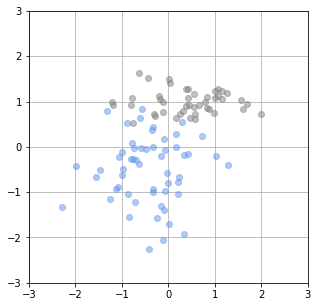

In [2]:
N = 100 # 샘플 수
K = 2 # 분포의 수

# generate data using gaussian distribution

mu = np.array([
    [-0.5, -0.5],
    [0.5, 1.0]
])

sig = np.array([
    [0.7, 0.7],
    [0.8, 0.3]
])

T_label = np.array(np.random.choice(2, N))
X = np.multiply(np.random.randn(100, 2), sig[T_label]) + mu[T_label]

plt.figure(figsize=(5, 5))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(X[T_label==0, 0], X[T_label==0, 1], 'cornflowerblue', alpha=0.5, marker='o', linestyle='none')
plt.plot(X[T_label==1, 0], X[T_label==1, 1], 'gray', alpha=0.5, marker='o', linestyle='none')

plt.grid(True)
plt.show()

## Logistic in 2D
$$y=\sigma{(w_0x + w_1y + w_2)}$$

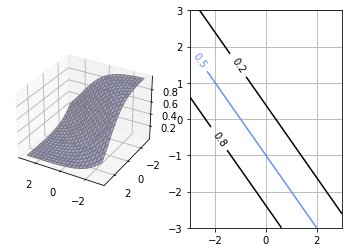

In [3]:
def logistic2(x, y, w):
    return 1.0 / (1.0 + np.exp(-(x * w[0] + y * w[1] + w[2])))

w_test = [-1, -1, -1]

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
xx, yy = np.meshgrid(x, y)
z = logistic2(xx, yy, w_test)


from mpl_toolkits.mplot3d import axes3d

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx, yy, z, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)
ax.view_init(30, 120)

plt.subplot(1, 2, 2)
cont = plt.contour(xx, yy, z, levels=(0.2, 0.5, 0.8), colors=['black','cornflowerblue','black'])
cont.clabel(fmt="%1.1f", fontsize=10)
plt.grid(True)

plt.show()

In [4]:
def cross_entropy(w, x, t):
    z = logistic2(x[:, 0], x[:, 1], w)
    num = x.shape[0]
    return -1.0 / num * np.sum(np.multiply(t, np.log(z)) + np.multiply(1-t, np.log(1-z)))

# test
w = np.array([-1, -1, -1])
print(cross_entropy(w, X, T_label))

1.5544585631306402


In [5]:
def dev_cross_entropy(w, x, t):
    z = logistic2(x[:, 0], x[:, 1], w)
    num = x.shape[0]

    par_a_w0 = x[:, 0]
    par_a_w1 = x[:, 1]
    par_a_w2 = 1

    par_y_a = np.multiply(z, 1-z)

    par_e_y = -np.divide(t, z) + np.divide(1-t, 1-z)

    dev_w0 = np.sum(par_e_y * par_y_a * par_a_w0) / num
    dev_w1 = np.sum(par_e_y * par_y_a * par_a_w1) / num
    dev_w2 = np.sum(par_e_y * par_y_a * par_a_w2) / num

    return [dev_w0, dev_w1, dev_w2]

print("cross entropy before :", cross_entropy(w, X, T_label))
grad_w = dev_cross_entropy(w, X, T_label)
print("cross entropy after :", cross_entropy(w - grad_w, X, T_label))

cross entropy before : 1.5544585631306402
cross entropy after : 1.0844909781701724


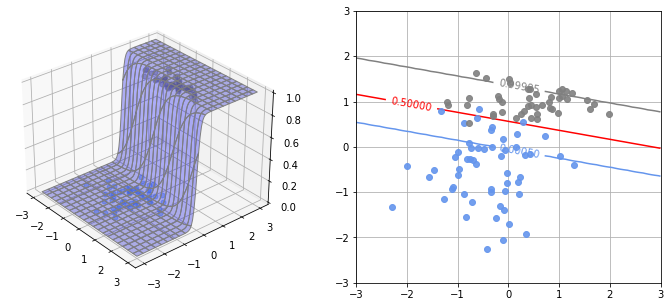

In [36]:
opt_w = minimize(cross_entropy, [-1, 1, 1], args=(X, T_label), jac=dev_cross_entropy, method="CG").x

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
xx, yy = np.meshgrid(x, y)
z = logistic2(xx, yy, opt_w)

plt.figure(figsize=(12, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx, yy, z, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)
ax.view_init(30, -40)
ax.plot(X[T_label==0, 0], X[T_label==0, 1], 0, color='cornflowerblue', marker='o', linestyle='none', markersize=5, alpha=0.5)
ax.plot(X[T_label==1, 0], X[T_label==1, 1], 1, color='gray',marker='o', linestyle='none', markersize=5, alpha=0.5)

plt.subplot(1, 2, 2)
cont = plt.contour(xx, yy, z, levels=(0.0005, 0.5, 0.99995), colors=['cornflowerblue','red','gray'])
cont.clabel(fmt="%1.5f", fontsize=10)
plt.plot(X[T_label==0, 0], X[T_label==0, 1], 'cornflowerblue', alpha=0.9, marker='o', linestyle='none')
plt.plot(X[T_label==1, 0], X[T_label==1, 1], 'gray', alpha=0.9, marker='o', linestyle='none')
plt.grid(True)

plt.show()